In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data = pd.read_excel(r"Data_Train.xlsx")

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.dropna(inplace = True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis

Date_Of_journey is object data type, we have to convert this into timestamp for prediction

We use pandas to_datetime function

.dt.day will extract day of that date
.dt.month will extract month of that date


In [10]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [11]:
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
#since we converted Date_of_Journey column into integers, we are dropping it

train_data.drop(["Date_of_Journey"],axis = 1, inplace = True)

In [14]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

train_data["Dep_Min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

train_data.drop(["Dep_Time"],axis = 1, inplace = True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

train_data["Arrival_Min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

train_data.drop(["Arrival_Time"],axis = 1, inplace = True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
#Feature engineering for Duration
duration = list(train_data["Duration"])

duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    if "h" not in duration[i]:
        duration_hours.append(0)
    else:
        duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    if "m" not in duration[i]:
        duration_minutes.append(0)
    else:
        duration_minutes.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [22]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_minutes"] = duration_minutes

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [23]:
train_data.drop(["Duration"],axis = 1, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data

1. Nominal Data -> data not in any order -> OneHotEncoder is used
2. Ordinal Data -> data in order -> LabelEncoder is used

In [25]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

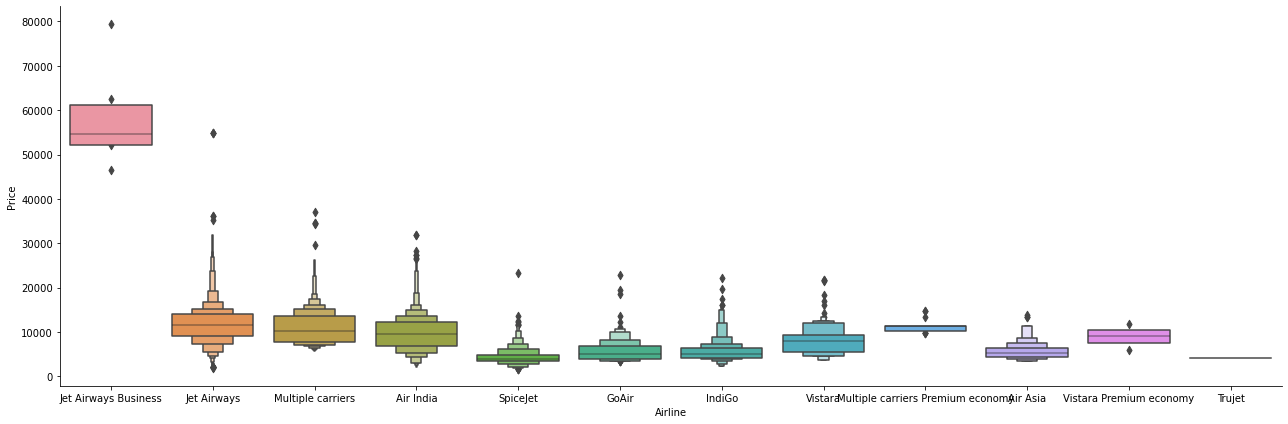

In [28]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

# refer to this one-hot encoding technique
https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html#

In [29]:

#As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

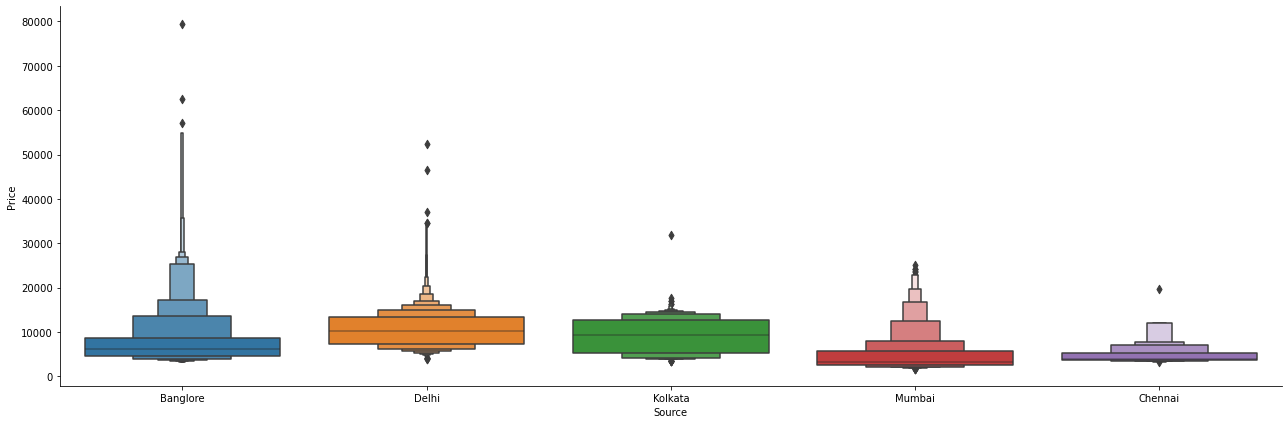

In [31]:
#Source vs Price
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [32]:

#As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source)

Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [33]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

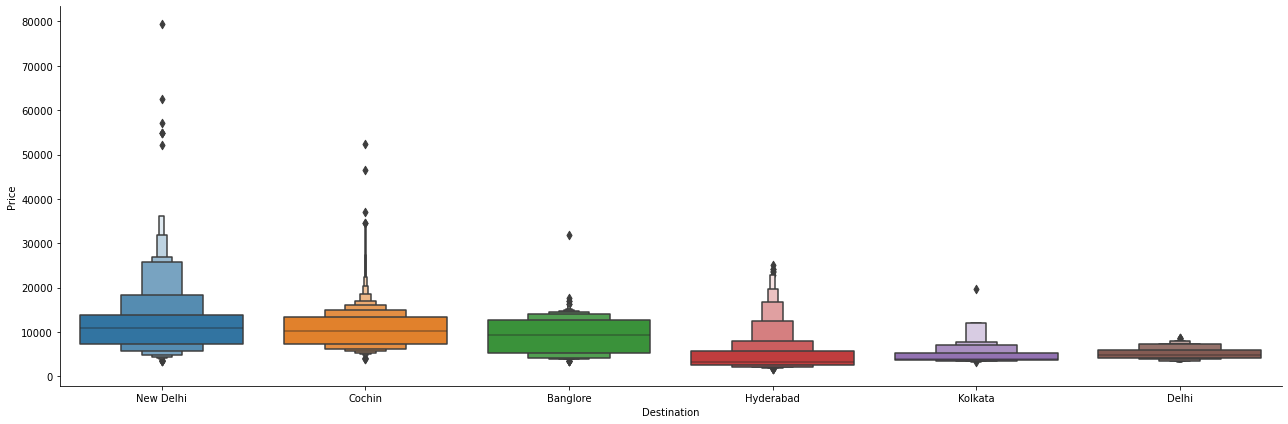

In [34]:
#Destination vs Price
sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [35]:
#As Source is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination)

Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [36]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [37]:
train_data["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [38]:
train_data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [40]:
#As majorly Additional_info does not contribute any value to the output,
#as there is No info for 8344 records (80%)
#Also, the column Route and Total_Stops have similar information hence we are dropping Route

train_data.drop(["Route","Additional_Info"],axis = 1, inplace = True)

In [41]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [46]:
#As Total_Stops has Ordinal categorical type, we perform LabelEncoder
#We assign values with corresponding keys

train_data.replace({"non-stop":0,"1 stop": 1, "2 stops": 2,"3 stops":3, "4 stops":4},inplace = True)

In [47]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [48]:
#Concenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [49]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [50]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [51]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [53]:
data_train.shape

(10682, 32)

# Test Set

In [54]:
test_data = pd.read_excel(r"Test_set.xlsx")

In [55]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [57]:
#preprocessing

print("Test data info")

test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Test data info
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [56]:
print(test_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [58]:
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format = "%d/%m/%Y").dt.day

test_data["Journey_month"] = pd.to_datetime(test_data.Date_of_Journey, format = "%d/%m/%Y").dt.month

test_data.drop(["Date_of_Journey"],axis = 1, inplace = True)

test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour

test_data["Dep_Min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

test_data.drop(["Dep_Time"],axis = 1, inplace = True)

test_data["Arrival_hour"] = pd.to_datetime(test_data["Arrival_Time"]).dt.hour

test_data["Arrival_Min"] = pd.to_datetime(test_data["Arrival_Time"]).dt.minute

test_data.drop(["Arrival_Time"],axis = 1, inplace = True)

#Feature engineering for Duration
duration = list(test_data["Duration"])

duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    if "h" not in duration[i]:
        duration_hours.append(0)
    else:
        duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    if "m" not in duration[i]:
        duration_minutes.append(0)
    else:
        duration_minutes.append(int(duration[i].split(sep = "m")[0].split()[-1]))
        
test_data["Duration_hours"] = duration_hours
test_data["Duration_minutes"] = duration_minutes

test_data.drop(["Duration"],axis = 1, inplace = True)


#As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = test_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

#As Source is Nominal Categorical data we will perform OneHotEncoding

Source = test_data[["Source"]]

Source = pd.get_dummies(Source)

Source.head()

#As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = test_data[["Destination"]]

Destination = pd.get_dummies(Destination)

Destination.head()

test_data.drop(["Route","Additional_Info"],axis = 1, inplace = True)

test_data.replace({"non-stop":0,"1 stop": 1, "2 stops": 2,"3 stops":3, "4 stops":4},inplace = True)

#Concenate dataframe --> train_data + Airline + Source + Destination

data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

data_test.head()


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


##Feature Selection - Finding out the best features which have good relation to target variable
1.heatmap
2.feature_importance_
3. SelectKBest

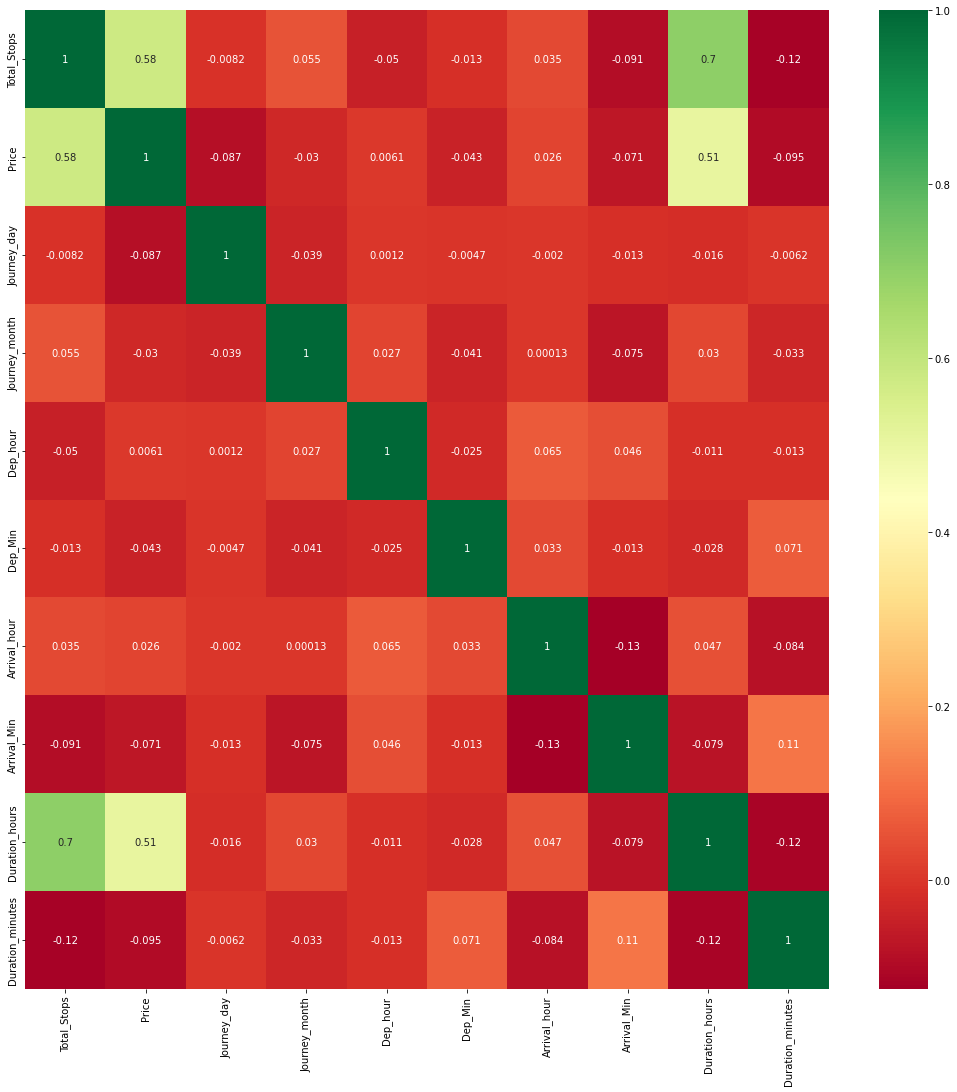

In [66]:
#Using Heatmap to find correlation between dependent and independent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(method = 'pearson'),annot = True, cmap = "RdYlGn")
plt.show()

In [64]:
train_data.corr(method = 'kendall')

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_minutes
Total_Stops,1.000000,0.576916,-0.008224,0.054545,-0.049800,-0.012501,0.034852,-0.090943,0.704850,-0.119758
Price,0.576916,1.000000,-0.087342,-0.029808,0.006105,-0.043395,0.025769,-0.070773,0.505814,-0.095397
Journey_day,-0.008224,-0.087342,1.000000,-0.039228,0.001207,-0.004701,-0.002033,-0.012615,-0.016339,-0.006190
Journey_month,0.054545,-0.029808,-0.039228,1.000000,0.027178,-0.040508,0.000126,-0.074777,0.030335,-0.033191
Dep_hour,-0.049800,0.006105,0.001207,0.027178,1.000000,-0.025156,0.064882,0.045703,-0.011214,-0.013271
Dep_Min,-0.012501,-0.043395,-0.004701,-0.040508,-0.025156,1.000000,0.033359,-0.012916,-0.027898,0.070952
Arrival_hour,0.034852,0.025769,-0.002033,0.000126,0.064882,0.033359,1.000000,-0.125149,0.046950,-0.084302
Arrival_Min,-0.090943,-0.070773,-0.012615,-0.074777,0.045703,-0.012916,-0.125149,1.000000,-0.078721,0.113691
Duration_hours,0.704850,0.505814,-0.016339,0.030335,-0.011214,-0.027898,0.046950,-0.078721,1.000000,-0.116205
Duration_minutes,-0.119758,-0.095397,-0.006190,-0.033191,-0.013271,0.070952,-0.084302,0.113691,-0.116205,1.000000


In [65]:
train_data.corr(method = 'pearson')

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_minutes
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_Min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_Min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_minutes,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


In [68]:
data_train.shape

(10682, 32)

In [69]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_Min', 'Arrival_hour', 'Arrival_Min', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [70]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_Min', 'Arrival_hour', 'Arrival_Min', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [71]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [72]:
#Important features using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [73]:
print(selection.feature_importances_)


[2.34824352e-01 1.44422925e-01 5.27734982e-02 2.41107013e-02
 2.10080187e-02 2.76183078e-02 1.94619701e-02 1.07963323e-01
 1.72443690e-02 1.03938677e-02 2.04761409e-03 1.92857023e-02
 1.42172721e-01 6.72492901e-02 1.79244848e-02 8.56330483e-04
 3.23143809e-03 9.98676752e-05 5.12633186e-03 8.43442508e-05
 8.12066560e-03 4.42199489e-04 1.44445061e-02 1.83301843e-03
 5.64463546e-03 2.13835271e-03 9.46785666e-03 1.51193661e-02
 6.95599824e-03 4.85139644e-04 1.74488037e-02]


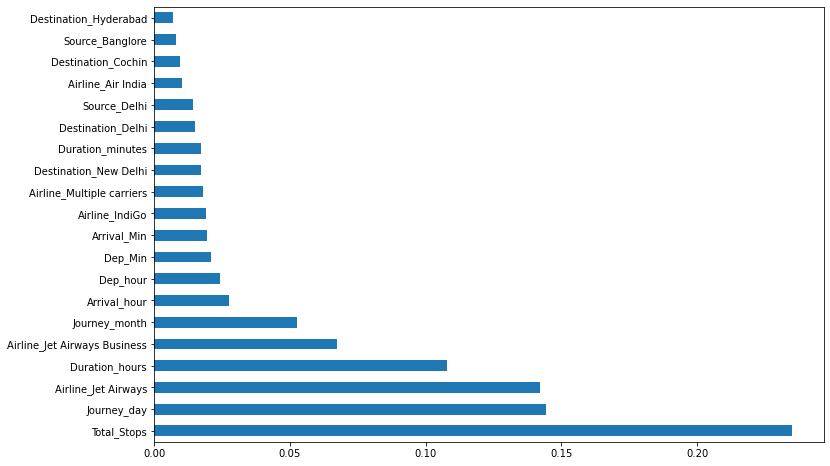

In [74]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# fitting model using Random Forest

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [77]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [120]:
#Using score to get the accuracy of different models
reg_rf.score(X_train,y_train)

0.954055114992899

In [121]:
#Used cross validation score to get the best model between RF, Decision Tree, Linear Regression, Multiple LR
from sklearn.model_selection import cross_val_score
cross_val_score(reg_rf,X_train,y_train)

array([0.81396248, 0.82799789, 0.78733989, 0.78759764, 0.79360308])

In [81]:
#make a prediction for test data
y_pred = reg_rf.predict(X_test)

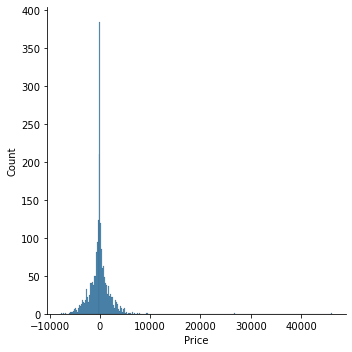

In [83]:
sns.displot(y_test-y_pred)
plt.show()

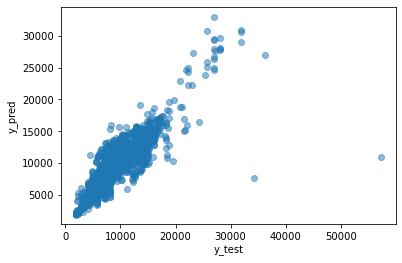

In [84]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [85]:
#Using sklearn metrics APIs to find the accuracy
from sklearn import metrics

In [86]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1182.9597739871135
MSE: 4397500.491136292
RMSE: 2097.0218146543666


In [87]:
metrics.r2_score(y_test,y_pred)

0.7960537517839341

In [88]:
#Using Decesion Tree to compare results with RandomForest

from sklearn.tree import DecisionTreeRegressor

In [89]:
reg_dt = DecisionTreeRegressor()
reg_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [122]:
#Using score to get the accuracy of different models
reg_dt.score(X_train,y_train)

0.9692484150527355

In [123]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg_dt,X_train,y_train)

array([0.66445844, 0.71738309, 0.72943342, 0.71457857, 0.68568707])

In [90]:
#make a prediction for test data
y_pred = reg_dt.predict(X_test)

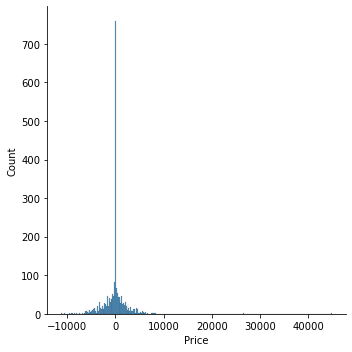

In [91]:
sns.displot(y_test-y_pred)
plt.show()

In [92]:
metrics.r2_score(y_test,y_pred)

0.7304007592575776

In [95]:
#used linear regression to check the accuracy
from sklearn.linear_model import LinearRegression
X_train_lr = X_train[['Total_Stops']]

In [96]:
print(X_train_lr)

       Total_Stops
10005            1
3684             1
1034             1
3909             1
3088             2
...            ...
5734             1
5191             1
5390             1
860              0
7270             1

[8545 rows x 1 columns]


In [97]:
X_test_lr = X_test[['Total_Stops']]

In [98]:
print(X_test_lr)

       Total_Stops
6075             2
3544             1
9291             1
5032             0
2483             1
...            ...
9797             1
9871             0
10063            1
8802             1
8617             1

[2137 rows x 1 columns]


In [99]:
print(y_train)

10005     9149
3684     12373
1034      5583
3909      7695
3088     11972
         ...  
5734     12242
5191     10844
5390      7670
860       6144
7270     10262
Name: Price, Length: 8545, dtype: int64


In [100]:
print(y_test)

6075     16655
3544      4959
9291      9187
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8802      8824
8617     14151
Name: Price, Length: 2137, dtype: int64


In [108]:
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train)

LinearRegression()

In [124]:
lr_model.score(X_train_lr,y_train)

0.36816805314525725

In [125]:
cross_val_score(lr_model,X_train_lr,y_train)

array([0.39724227, 0.3685043 , 0.33028764, 0.36405488, 0.38711267])

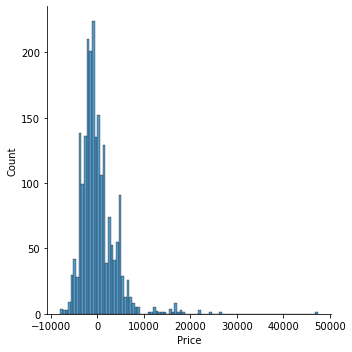

0.3509147794854318

In [109]:
#make a prediction for test data
y_pred = lr_model.predict(X_test_lr)
#Plotting the difference
sns.displot(y_test-y_pred)
plt.show()
#calculating accuracy
metrics.r2_score(y_test,y_pred)

In [106]:
X_train_mlr = X_train[['Total_Stops','Journey_day','Duration_hours']]

In [107]:
X_test_mlr = X_test[['Total_Stops','Journey_day','Duration_hours']]

In [110]:
mlr_model = LinearRegression()
mlr_model.fit(X_train_mlr, y_train)

LinearRegression()

In [119]:
cross_val_score(mlr_model,X_train_mlr,y_train)

array([0.43633945, 0.39191519, 0.35719987, 0.37958488, 0.4189253 ])

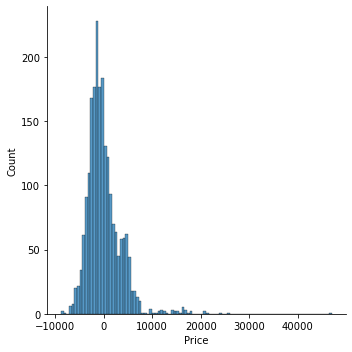

0.3912058628021181

In [112]:
#make a prediction for test data
y_pred = mlr_model.predict(X_test_mlr)
#Plotting the difference
sns.displot(y_test-y_pred)
plt.show()
#calculating accuracy
metrics.r2_score(y_test,y_pred)

# Hyperparameter tuning for so far best model - RandomForestRegressor

Choose following method for hyperparameter tuning

1. GridSearchCV (Exploring GridSearchCV for finding the best parameters)
2. RandomizedSearchCV --> Fast

In [127]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(RandomForestRegressor(),{
    'n_estimators': [1,10,20,30,40,50],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5,10,15,20],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10] 
},cv=5,return_train_score = False)

model.fit(X_train,y_train)
model.cv_results_

{'mean_fit_time': array([0.01201582, 0.05739908, 0.1114912 , 0.16459579, 0.21854148,
        0.2750236 , 0.00751915, 0.05546637, 0.11025367, 0.16256318,
        0.21727376, 0.27241588, 0.00815458, 0.06321864, 0.1182385 ,
        0.16772127, 0.22291012, 0.27700882, 0.0079587 , 0.05758767,
        0.11366262, 0.16747341, 0.22862558, 0.28358498, 0.00784035,
        0.05765743, 0.11479964, 0.19636297, 0.22266583, 0.29794235,
        0.00783195, 0.0583735 , 0.1163013 , 0.17397199, 0.2353107 ,
        0.29797845, 0.00800905, 0.0595645 , 0.1174449 , 0.17668839,
        0.2359551 , 0.29138122, 0.00752301, 0.059512  , 0.11685982,
        0.16952667, 0.22407708, 0.28768644, 0.00746312, 0.05683122,
        0.11294498, 0.16644692, 0.22211256, 0.27854958, 0.00748549,
        0.05730338, 0.11147666, 0.16509576, 0.21905746, 0.28211279,
        0.00782685, 0.05863762, 0.11710396, 0.16654668, 0.23250284,
        0.28252635, 0.00749998, 0.0565557 , 0.11626186, 0.16845102,
        0.22512422, 0.28325744,

In [137]:
print(pd.DataFrame(model.cv_results_))


     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.012016      0.003427         0.001706        0.000396   
1         0.057399      0.000551         0.002111        0.000064   
2         0.111491      0.002706         0.002858        0.000043   
3         0.164596      0.003828         0.003674        0.000153   
4         0.218541      0.004400         0.004503        0.000071   
..             ...           ...              ...             ...   
955       0.023611      0.000858         0.002455        0.000219   
956       0.045256      0.000571         0.003618        0.000113   
957       0.068240      0.001538         0.005074        0.000165   
958       0.092787      0.000682         0.006718        0.000221   
959       0.109213      0.001070         0.007461        0.000105   

    param_max_depth param_max_features param_min_samples_leaf  \
0                 5               auto                      1   
1                 5               auto   

In [129]:
print(model.best_score_)
print(model.best_params_)

0.8242411111819494
{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}


In [ ]:
#GridSearchCV has computational problem, as it tries to get scores for all the permutations of the parameters

In [153]:
#RandomizedSearchCV has another parameter called n_iter
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator = reg_rf,{
    'n_estimators': [1,10,20,30,40,50],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5,10,15,20],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10] 
},cv=5,return_train_score = False, n_iter = 60)
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=60,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [1, 10, 20, 30, 40,
                                                         50]})

In [154]:
print(pd.DataFrame(rs.cv_results_))


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.113839      0.013508         0.007082        0.000144   
1        0.076457      0.000493         0.005677        0.000067   
2        0.065459      0.000718         0.004371        0.000073   
3        0.007574      0.000140         0.001210        0.000093   
4        0.031111      0.000611         0.002788        0.000048   
5        0.009997      0.000264         0.001035        0.000015   
6        0.079541      0.000718         0.005364        0.000061   
7        0.010905      0.000111         0.001050        0.000010   
8        0.004568      0.000187         0.001038        0.000008   
9        0.187987      0.000868         0.004224        0.000082   
10       0.077706      0.001496         0.002314        0.000146   
11       0.429151      0.006707         0.008433        0.000130   
12       0.005633      0.000106         0.001135        0.000018   
13       0.180346      0.000946         0.004099

In [155]:
print(rs.best_score_)
print(rs.best_params_)

0.8185318859598152
{'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15}


In [156]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [157]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [163]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [164]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [167]:
print(rf_random.best_params_)


{'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


In [168]:
print(rf_random.best_score_)

0.821910379373778


In [169]:
prediction = rf_random.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


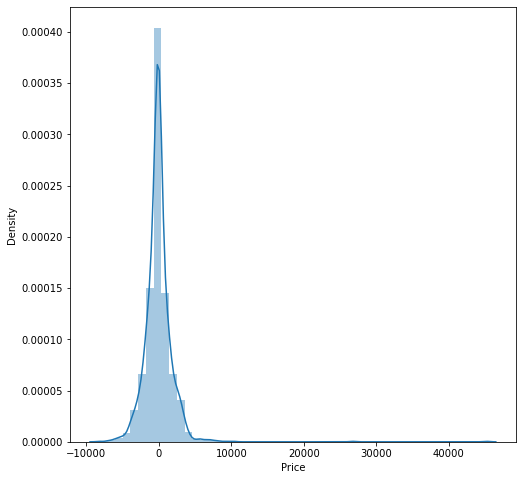

In [170]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

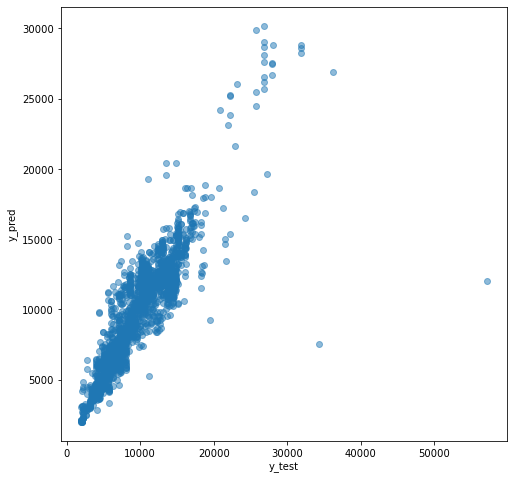

In [171]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [172]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1166.7241148338758
MSE: 4066339.4497239413
RMSE: 2016.5166623968028


In [174]:
#Save the model to reuse it again
import pickle

In [175]:
#open a file where you want to save the data
file = open("flight_randomforest.pkl",'wb')
pickle.dump(rf_random, file)
model = open('flight_randomforest.pkl','rb')
forest = pickle.load(model)
y_prediction = forest.predict(X_test)


In [176]:
metrics.r2_score(y_test, y_prediction)


0.8114122610296994